# Redes Neuronales

In [14]:
import pandas as pd

def get_mpg_data():
    data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                    header=None,sep='\s+')
    return data

data=get_mpg_data()

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)



In [15]:
data.rename(columns={0:'mpg',1:'cylinders',2:'displacement',3:'horsepower',4:'weight',
             5:'acceleration',6:'model_year',7:'origin',8:'car_name'},inplace=True)

In [16]:
data['car_name'] = data['car_name'].astype('category')
data['horsepower'] = data['horsepower'].astype('float',errors='ignore')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data['model_year'] = data['model_year'].astype('category')
data['origin'] = data['origin'].astype('category')

In [17]:
data.drop('car_name',inplace=True,axis=1)

In [18]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [19]:
data['year_range']=pd.cut(data['model_year'], bins=3)

In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,year_range
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"(69.988, 74.0]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"(69.988, 74.0]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"(69.988, 74.0]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"(69.988, 74.0]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"(69.988, 74.0]"


In [27]:
data.drop(columns={'model_year'},axis=1,inplace=True)

In [134]:
reg_data=pd.get_dummies(data).copy()
reg_data.dropna(axis=0,inplace=True)

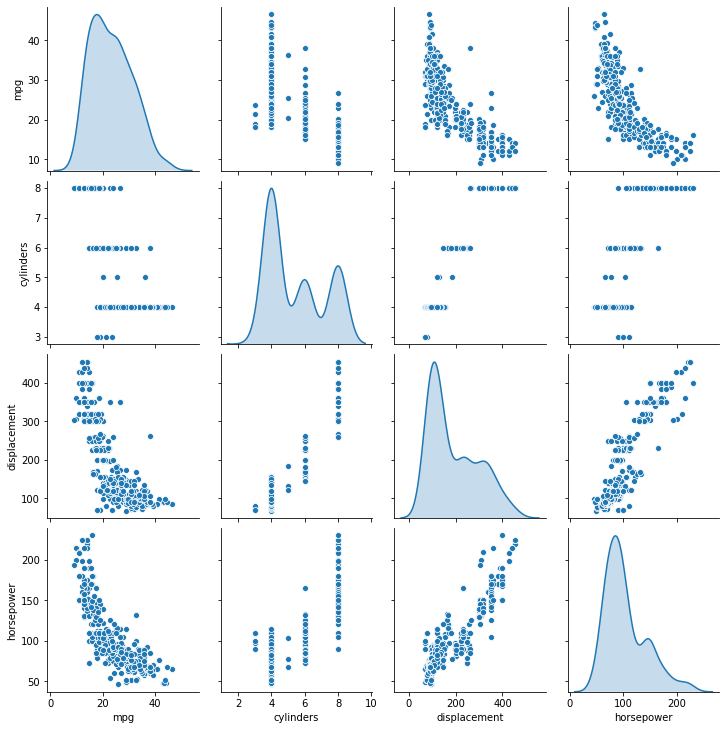

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[["mpg", "cylinders", "displacement", "horsepower"]], diag_kind="kde")

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y=reg_data.pop('mpg').values
X=scaler.fit_transform(reg_data.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Red Neuronal Simple

In [137]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print('Tensorflow Version : ',tf.__version__)

def build_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[input_dim]),
        layers.Dense(64,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

Tensorflow Version :  2.2.0


In [166]:
model = build_model(X.shape[1])

print("[INFO] training model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32,verbose=0)
print("[DONE] training model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training model...
[DONE] training model...


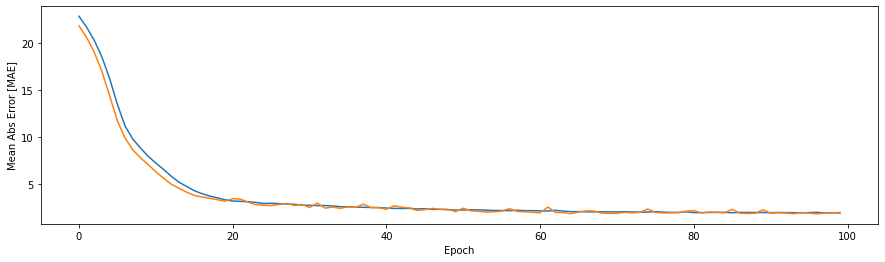

In [167]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

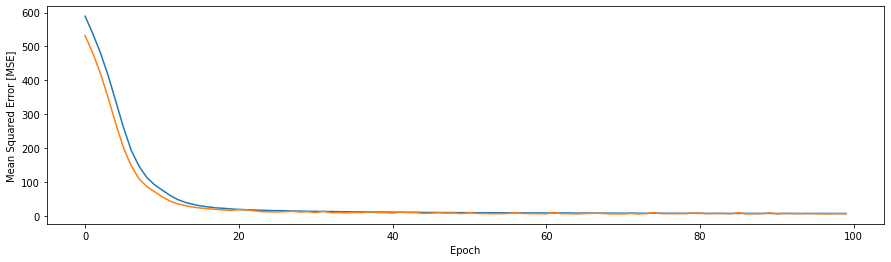

In [168]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.879122


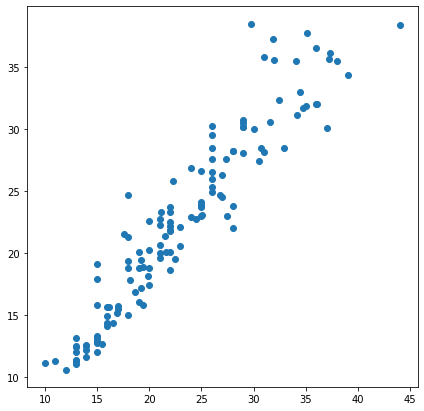

In [169]:
from sklearn.metrics import r2_score

y_hat=model.predict(X_test)
r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Red Neuronal Regularizacion

In [244]:
def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-5,l2=1e-4):
    model = keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[input_dim]),
        layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [245]:
model = build_regularized_model(X.shape[1],l2=1e-1,l1=1e-2)
print("[INFO] training regularized model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=200, batch_size=32,verbose=0)
print("[DONE] training regularized model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training regularized model...
[DONE] training regularized model...


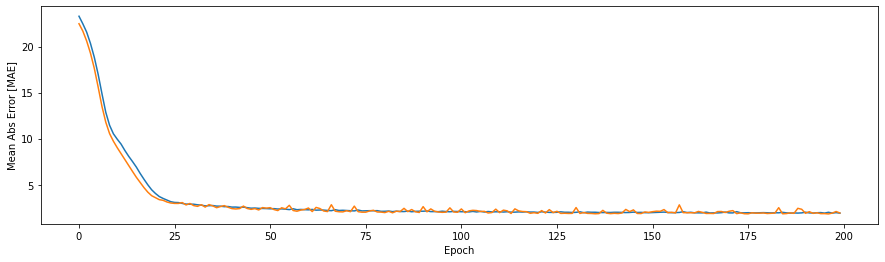

In [246]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

r^2 on test data : 0.871661


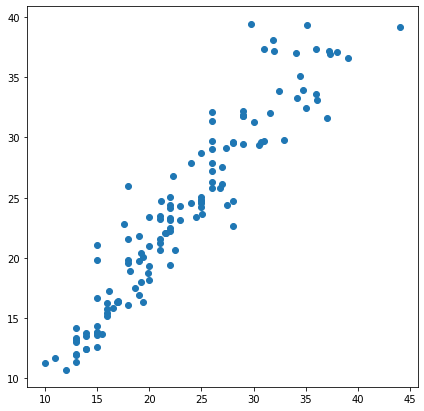

In [247]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [249]:
# Analisis Exploratorio de Casos COVID 

def get_owid_data(download):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        data.to_csv('data/covid_owid_data.csv')
    else:
        data=pd.read_csv('data/covid_owid_data.csv')
    return data

data=get_owid_data(False)

In [278]:
grouped_data=data.groupby(['location']).median()
grouped_data.sort_values(by=['new_cases_per_million'],inplace=True,ascending=False)

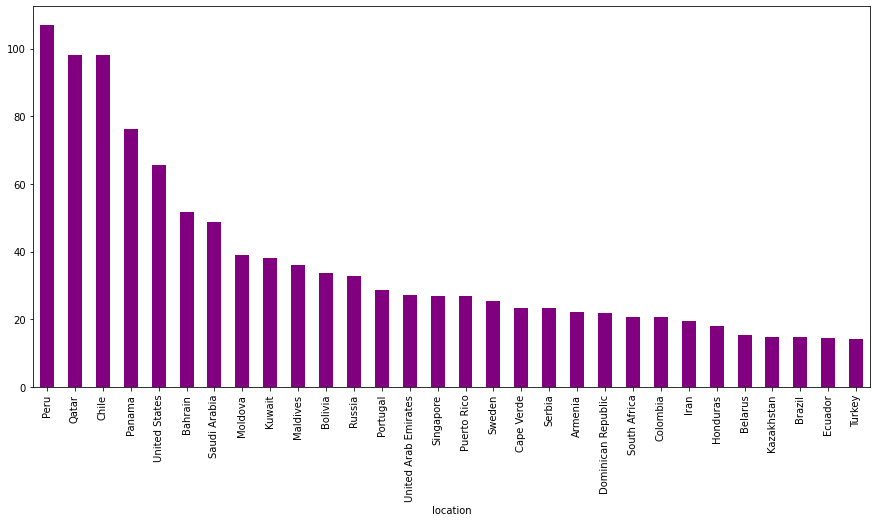

In [279]:
plt.figure(figsize=(15,7))
grouped_data['new_cases_per_million'].head(30).plot(kind="bar", color='purple')